Import Necessary Packages

In [418]:
import plotly 
plotly.tools.set_credentials_file(username='1215Diana', api_key='eyLsnlrNJd2hPfdI96al')
py.sign_in("1215Diana", "eyLsnlrNJd2hPfdI96al")

import plotly.plotly as py
from plotly.graph_objs import *

import networkx as nx
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pylab

Read in Necessary Dataset

In [133]:
data=pd.read_csv('~/Documents/capstone/not-that-into-you/dating.csv',encoding='latin1')

Choose which variables you want to cluster on.

In [292]:
bio_info=data[['iid','pid','match','age','sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga','exphappy']]

In [293]:
bio_info=bio_info.dropna(how='any')

Only keep one line of background information data for each participant.

In [462]:
bio_info_subset=bio_info.drop_duplicates(subset='iid')

Select Out the Speed-Dating Matches for Links

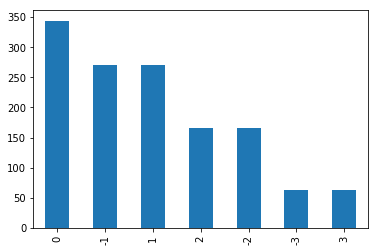

In [480]:
matches=bio_info[['iid','pid','match']]
matches=matches[matches.match==1]
matches['pid']=matches['pid'].astype(int)
matches = matches[matches.iid.isin(bio_info_subset.iid)&matches.pid.isin(bio_info_subset.iid)]
edges = list(zip(matches.iid,matches.pid))
new = pd.DataFrame.from_dict(cluster, orient='index').reset_index()
new.rename(columns={'index': 'iid', 0: 'cluster'}, inplace=True)
together=pd.merge(new,matches,left_on=new.iid,right_on=matches.iid,how='right')
together2=pd.merge(together,new,left_on=together.pid,right_on=new.iid,how='left')
together2=together2.groupby(['iid_x', 'iid']).last()
together2['difference']=together2.cluster_x-together2.cluster_y
together2['difference'].value_counts().plot( kind='bar')
plt.show()

Perform K-means clustering. Normalize and generate cluster labels.

In [463]:
kmeans_data=bio_info_subset[['age','sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga','exphappy']]
X=np.array(kmeans_data)

In [464]:
kmeans=KMeans(n_clusters=4).fit(X)

In [468]:
bio_info_subset['cluster_assignment']=kmeans.labels_

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [469]:
G=nx.Graph()
G.add_nodes_from(bio_info_subset.iid)
G.add_edges_from(edges)

In [470]:
pos=nx.spring_layout(G)
nx.set_node_attributes(G,'pos',pos)
cluster=dict(zip(bio_info_subset.iid, bio_info_subset.cluster_assignment))
nx.set_node_attributes(G, 'cluster', cluster)

In [471]:
edge_trace = Scatter(
    x=[], 
    y=[], 
    line=Line(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.node[edge[0]]['pos']
    x1, y1 = G.node[edge[1]]['pos']
    edge_trace['x'] += [x0, x1, None]
    edge_trace['y'] += [y0, y1, None]

node_trace = Scatter(
    x=[], 
    y=[], 
    text=[],
    mode='markers', 
    hoverinfo='text',
    marker=Marker(
        showscale=True,
        # colorscale options
        # 'Greys' | 'Greens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' |
        # Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIGnBu'
        colorscale='YIGnBu',
        reversescale=True,
        color=[], 
        size=10,         
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

for node in G.nodes():
    x, y = G.node[node]['pos']
    node_trace['x'].append(x)
    node_trace['y'].append(y)
    node_trace['marker']['color'].append(cluster[node])
    node_info = 'Cluster: '+str(cluster[node])
    node_trace['text'].append(node_info)

In [472]:
fig = Figure(data=Data([edge_trace, node_trace]),
             layout=Layout(
                title='<br>Network graph made with Python',
                titlefont=dict(size=16),
                showlegend=False, 
                width=650,
                height=650,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plot.ly/ipython-notebooks/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=XAxis(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=YAxis(showgrid=False, zeroline=False, showticklabels=False)))

py.iplot(fig, filename='networkx')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~1215Diana/0 or inside your plot.ly account where it is named 'networkx'
